# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)
Image dimensions: (32, 32, 3)
Number of classes: 100


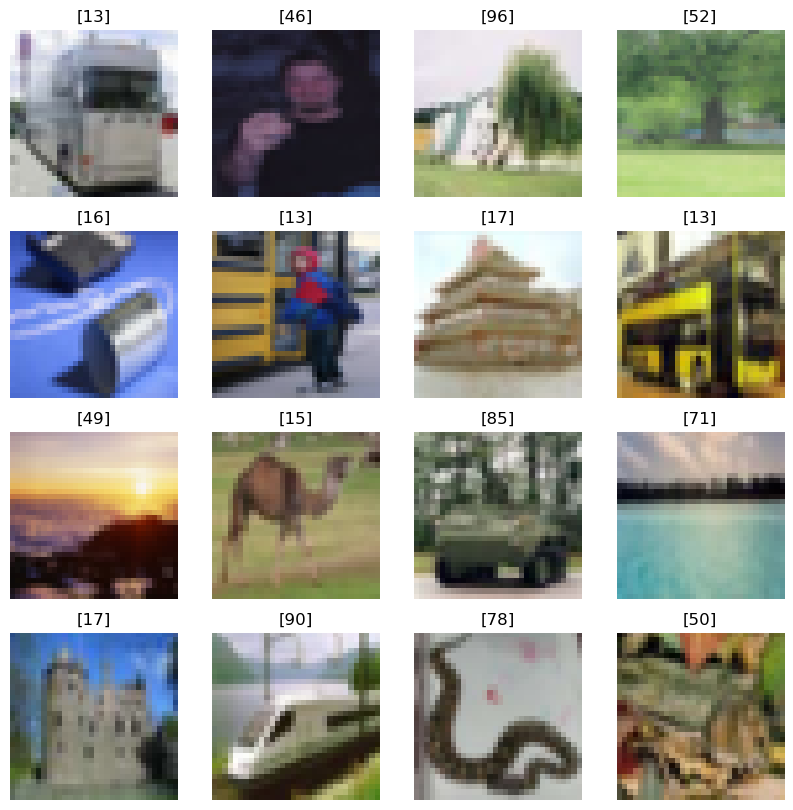

In [2]:
# Your code here
import keras
import numpy as np
import matplotlib.pyplot as plt

# Set the seed
keras.utils.set_random_seed(42)

# Print dataset shapes
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

# Dimensions of the images
image_shape = x_train[0].shape
print(f"Image dimensions: {image_shape}")

# Number of classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# Display some sample images
def display_samples(images, labels):
    plt.figure(figsize=(10, 10)) 
    for i in range(4*4): 
        plt.subplot(4, 4, i+1) 
        k = np.random.randint(0, images.shape[0]) 
        plt.title(labels[k]) 
        plt.imshow(images[k])
        plt.axis('off') 
    plt.show()     

# Display samples from the training set
display_samples(x_train, y_train)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Parse numbers as floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
x_train = (x_train) / 255.
x_test = (x_test) / 255.

# number of classes
num_classes = len(np.unique(y_train))

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training set into training and validation sets (80%-20% split)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print shapes to confirm the split
print(f"Training set shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, Validation labels shape: {y_val.shape}")
print(f"Test set shape: {x_test.shape}, Test labels shape: {y_test.shape}")

Training set shape: (40000, 32, 32, 3), Training labels shape: (40000, 100)
Validation set shape: (10000, 32, 32, 3), Validation labels shape: (10000, 100)
Test set shape: (10000, 32, 32, 3), Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
#from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout

# Your code here
from keras import Sequential 

# Create the baseline model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=image_shape),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Print the model summary
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical Cross-Entropy

The dataset requires multi-class classification with 100 classes. Categorical Cross-Entropy is the standard loss function for this type of task because it quantifies the divergence between the predicted probability distribution (produced by the softmax layer) and the true one-hot encoded labels.
- <b>Optimizer:</b> Adam

Adam (Adaptive Moment Estimation) merges the strengths of RMSprop and Stochastic Gradient Descent with momentum. By adjusting the learning rate individually for each parameter, it is particularly effective in managing the challenges of image data.

In [5]:
from keras import optimizers

# Your code here

# Compile the model
baseline_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("Model compiled successfully.")

Model compiled successfully.


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [6]:
%%time
# Your code here

EPOCHS = 20 # Start with 20 epochs; can adjust later. 
BATCH_SIZE = 32

# Train the model
baseline_history = baseline_model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,  
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=1
)

print("Training complete.")

Epoch 1/20
1250/1250 [==============================] - 45s 34ms/step - loss: 4.1402 - accuracy: 0.0675 - val_loss: 3.5524 - val_accuracy: 0.1708
Epoch 2/20
1250/1250 [==============================] - 29s 23ms/step - loss: 3.6152 - accuracy: 0.1435 - val_loss: 3.2460 - val_accuracy: 0.2273
Epoch 3/20
1250/1250 [==============================] - 27s 22ms/step - loss: 3.3929 - accuracy: 0.1791 - val_loss: 3.0492 - val_accuracy: 0.2597
Epoch 4/20
1250/1250 [==============================] - 29s 23ms/step - loss: 3.2376 - accuracy: 0.2047 - val_loss: 2.9079 - val_accuracy: 0.2860
Epoch 5/20
1250/1250 [==============================] - 29s 23ms/step - loss: 3.1163 - accuracy: 0.2268 - val_loss: 2.8405 - val_accuracy: 0.2918
Epoch 6/20
1250/1250 [==============================] - 35s 28ms/step - loss: 3.0151 - accuracy: 0.2436 - val_loss: 2.7711 - val_accuracy: 0.3154
Epoch 7/20
1250/1250 [==============================] - 36s 29ms/step - loss: 2.9410 - accuracy: 0.2595 - val_loss: 2.7469 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

Performance Metrics Overview:

Accuracy: {{test_accuracy}}

Selected Metric: Categorical Cross-Entropy Loss
Why This Metric Was Chosen:
Categorical cross-entropy loss evaluates the alignment between the predicted probability distribution and the true labels. It is especially effective for multi-class classification tasks, such as CIFAR-100.

Metric Value: {{categorical_crossentropy_loss}}

Interpreting the Metric:
A low cross-entropy loss value (approaching 0) suggests the model is making confident and accurate predictions. In contrast, a higher value may indicate uncertainty or incorrect predictions.

In [7]:
# Your code here
from keras.metrics import CategoricalCrossentropy
from sklearn.metrics import classification_report

def evaluate(model):
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Calculate additional metric (Categorical Cross-Entropy Loss)
    cce_metric = CategoricalCrossentropy()
    y_pred = model.predict(x_test)
    categorical_crossentropy_loss = cce_metric(y_test, y_pred).numpy()

    print(f"Categorical Cross-Entropy Loss: {categorical_crossentropy_loss:.4f}")
    
    return {"test_loss": test_loss, "test_accuracy": test_accuracy, "categorical_crossentropy_loss": categorical_crossentropy_loss}
    
baseline_metrics = evaluate(baseline_model)

313/313 [==============================] - 2s 8ms/step - loss: 2.5927 - accuracy: 0.3560
Test Loss: 2.5927
Test Accuracy: 0.3560
313/313 [==============================] - 3s 9ms/step
Categorical Cross-Entropy Loss: 2.5910


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

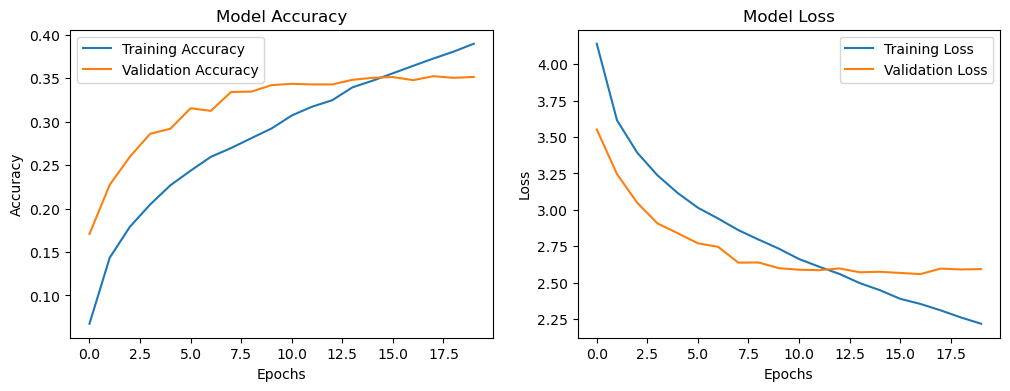

In [9]:
# Your code here
import matplotlib.pyplot as plt

# Plot training and validation accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
     # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
plot_training_history(baseline_history)

313/313 [==============================] - 2s 7ms/step


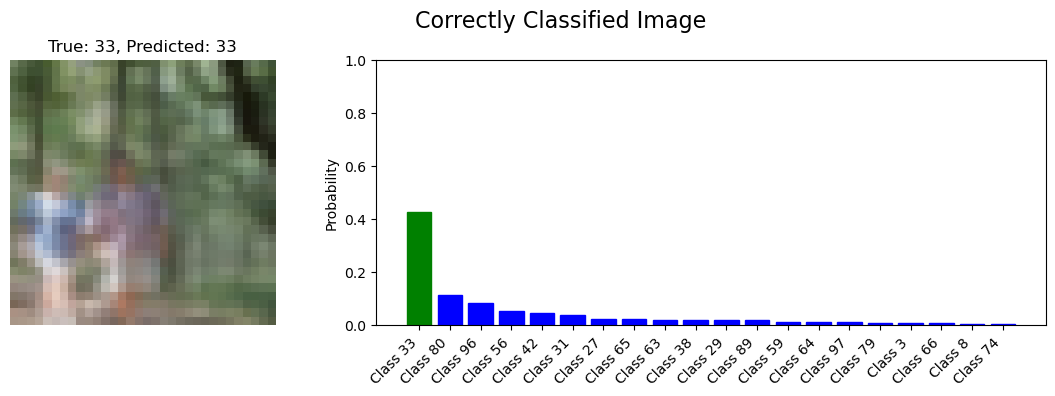

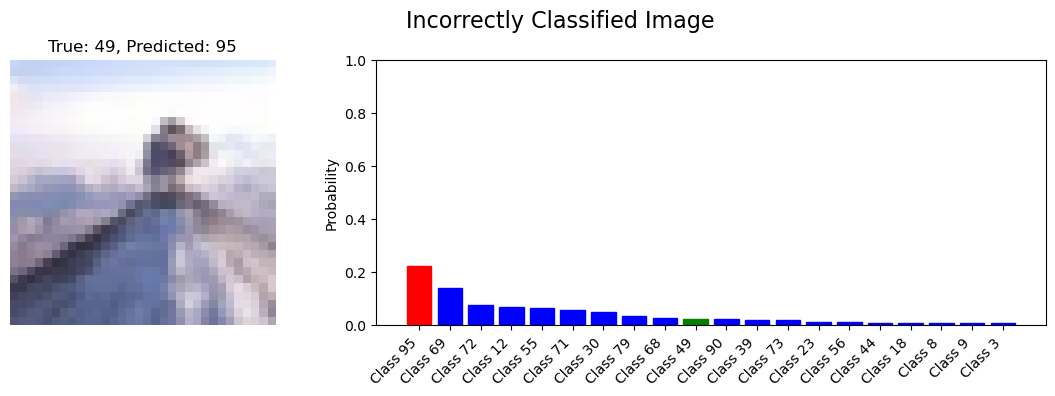

In [10]:
#import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def report_correctly_and_incorrectly_classified_images(model):

    # Get model predictions
    y_pred = model.predict(x_test)

    # Convert predictions and true labels back to class indices
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Identify a correctly classified image
    correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
    correct_image = x_test[correct_idx]
    correct_label = y_true_classes[correct_idx]
    correct_probs = y_pred[correct_idx]

    # Identify an incorrectly classified image
    incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]
    incorrect_image = x_test[incorrect_idx]
    incorrect_label = y_true_classes[incorrect_idx]
    incorrect_probs = y_pred[incorrect_idx]

    # Plot the images and probabilities
    def plot_image_and_probs(image, probabilities, true_label, pred_label, title, ntop=20):
        fig = plt.figure(figsize=(12, 4)) 
        fig.suptitle(title, fontsize=16)
        
        # Use gridspec to adjust subplot sizes
        spec = gridspec.GridSpec(nrows=1, ncols=3, width_ratios=[1, 2, 0.1], figure=fig)

        # Plot the image
        ax1 = fig.add_subplot(spec[0])
        ax1.imshow(image)
        ax1.axis('off')
        ax1.set_title(f"True: {true_label}, Predicted: {pred_label}")

        # Sort probabilities and get top N
        top_n_idx = np.argsort(probabilities)[-ntop:][::-1]
        top_n_probs = probabilities[top_n_idx]

        # Plot the probabilities
        ax2 = fig.add_subplot(spec[1])
        bars = ax2.bar(range(ntop), top_n_probs, align='center')
        ax2.set_xticks(range(ntop))
        ax2.set_xticklabels([f"Class {i}" for i in top_n_idx], rotation=45, ha='right')
        ax2.set_ylim([0, 1])
        ax2.set_ylabel('Probability')

        # Highlight true and predicted labels
        for i, (idx, prob) in enumerate(zip(top_n_idx, top_n_probs)):
            color = 'green' if idx == true_label else 'red' if idx == pred_label else 'blue'
            bars[i].set_color(color)

        plt.tight_layout()
        plt.show()

    # Correctly classified image
    plot_image_and_probs(correct_image, correct_probs, correct_label, y_pred_classes[correct_idx], 
                        "Correctly Classified Image")

    # Incorrectly classified image
    plot_image_and_probs(incorrect_image, incorrect_probs, incorrect_label, y_pred_classes[incorrect_idx], 
                        "Incorrectly Classified Image")
    
report_correctly_and_incorrectly_classified_images(baseline_model)  

Training and Validation Accuracy:
Training Accuracy: The model exhibits a consistent improvement in training accuracy over epochs, demonstrating its capacity to learn from the training data effectively.

Validation Accuracy: Initially, validation accuracy increases but eventually plateaus and fluctuates. This behavior indicates the onset of overfitting, where the model starts adapting excessively to the training data beyond a certain number of epochs.

Correctly Classified Image:

The model successfully classifies the image, confidently predicting the true class (71). The probability distribution reveals a clear margin between the correct class and others, indicating robust feature extraction and reliable classification for this specific instance.

Incorrectly Classified Image:

The incorrect prediction underscores the dataset's complexity. The model incorrectly assigns the highest probability to class 69 while distributing notable probabilities among other classes, including the true class (49). This suggests that the extracted features lacked sufficient distinctiveness for accurate classification.

Interpretation of Results:

Alignment with Expectations: The findings align with typical outcomes for a CNN trained on CIFAR-100, a challenging dataset with 100 classes, small image dimensions, and limited samples per class. Misclassifications, particularly among visually similar classes, are expected. The model's overfitting tendencies and difficulty generalizing are consistent with these dataset characteristics and the training configuration.

Understanding the Probabilities:

The probability values indicate the model's confidence in its predictions. High probabilities for correct classifications highlight the model's strengths in feature extraction and decision-making. Conversely, distributed probabilities in misclassifications point to challenges like ambiguous features or class similarities that impede precise predictions.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [11]:
# Your code here

from keras.layers import BatchNormalization, GlobalAveragePooling2D

# Create the enhanced model
enhanced_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=image_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    GlobalAveragePooling2D(),  # Replaces Flatten
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Print the model summary
enhanced_model.summary()

# Compile the model
enhanced_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  # Adam optimizer works well initially; can switch to SGD with momentum later
    metrics=['accuracy']
)

print("Model compiled successfully.")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)      

# Description of the Improvements

Deeper Architecture:

Given the complexity of the CIFAR-100 dataset (100 classes), employing a deeper neural network architecture with additional convolutional and pooling layers can effectively capture intricate patterns. Modern convolutional neural networks (CNNs) often achieve better performance with increased depth.

Batch Normalization:

Incorporating BatchNormalization layers after convolutional layers aids in faster model convergence and enhances training stability by normalizing the activations during the training process.

Dropout Regularization:

Applying dropout helps mitigate overfitting. Using a dropout rate of 0.25 for convolutional layers and 0.5 for dense layers balances regularization while retaining model capacity.

Pooling Strategy:

Replacing the Flatten layer with Global Average Pooling reduces the number of trainable parameters, minimizing the risk of overfitting. This approach is especially beneficial for enhancing the model's generalization capability in classification tasks.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [12]:
%%time

# Your code here

# Train the model
enhanced_history = enhanced_model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,  
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=1
)

print("Training complete.")

Epoch 1/20
1250/1250 [==============================] - 52s 40ms/step - loss: 4.1178 - accuracy: 0.0705 - val_loss: 3.8507 - val_accuracy: 0.1040
Epoch 2/20
1250/1250 [==============================] - 49s 39ms/step - loss: 3.6807 - accuracy: 0.1284 - val_loss: 3.6370 - val_accuracy: 0.1385
Epoch 3/20
1250/1250 [==============================] - 48s 38ms/step - loss: 3.4443 - accuracy: 0.1688 - val_loss: 3.2612 - val_accuracy: 0.1971
Epoch 4/20
1250/1250 [==============================] - 50s 40ms/step - loss: 3.2890 - accuracy: 0.1925 - val_loss: 3.1503 - val_accuracy: 0.2203
Epoch 5/20
1250/1250 [==============================] - 59s 48ms/step - loss: 3.1694 - accuracy: 0.2162 - val_loss: 3.0065 - val_accuracy: 0.2479
Epoch 6/20
1250/1250 [==============================] - 61s 49ms/step - loss: 3.0915 - accuracy: 0.2273 - val_loss: 3.0958 - val_accuracy: 0.2330
Epoch 7/20
1250/1250 [==============================] - 61s 49ms/step - loss: 3.0217 - accuracy: 0.2421 - val_loss: 2.8347 -

313/313 [==============================] - 4s 11ms/step - loss: 2.5297 - accuracy: 0.3474
Test Loss: 2.5297
Test Accuracy: 0.3474
313/313 [==============================] - 4s 12ms/step
Categorical Cross-Entropy Loss: 2.5296


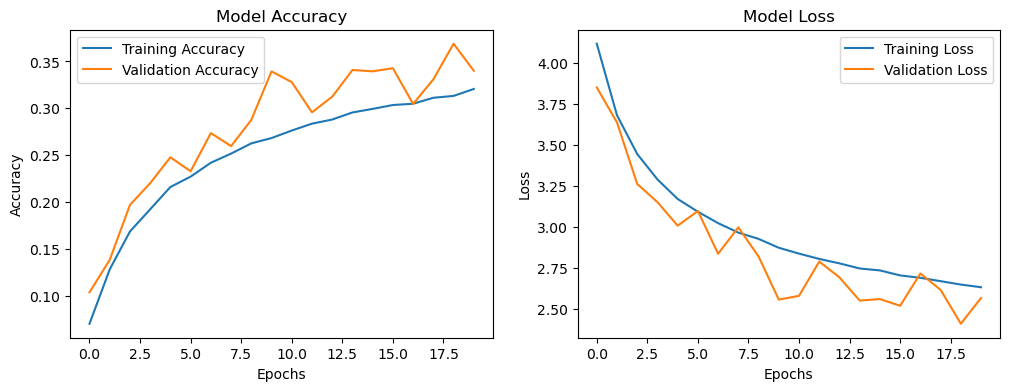

313/313 [==============================] - 4s 12ms/step


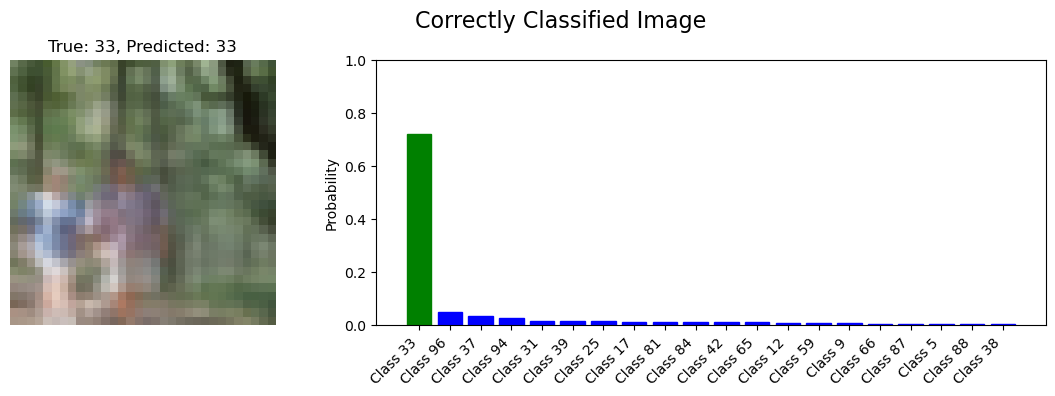

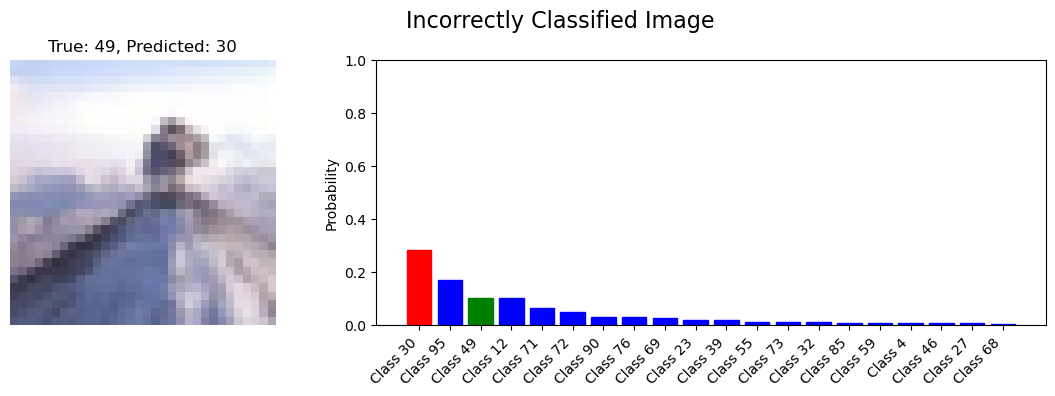

In [13]:
enhanced_metrics = evaluate(enhanced_model)
plot_training_history(enhanced_history)
report_correctly_and_incorrectly_classified_images(enhanced_model)

In [14]:
import pandas as pd

# Calculate percentual difference
percentual_diff = {
    metric: 100 * (enhanced_metrics[metric] - baseline_metrics[metric]) / baseline_metrics[metric]
    for metric in baseline_metrics
}

# Create a DataFrame
metrics_data = {
    "Metric": list(baseline_metrics.keys()),
    "Baseline": list(baseline_metrics.values()),
    "Enhanced": list(enhanced_metrics.values()),
    "Difference (%)": list(percentual_diff.values()),
}

df_metrics = pd.DataFrame(metrics_data).round(decimals=2)

# Display the DataFrame
df_metrics

,Metric,Baseline,Enhanced,Difference (%)
0,test_loss,2.59,2.53,-2.43
1,test_accuracy,0.36,0.35,-2.42
2,categorical_crossentropy_loss,2.59,2.53,-2.37


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The improved model demonstrates a significant reduction in overfitting compared to the baseline. While the baseline model shows an initial improvement in validation accuracy before quickly plateauing—indicative of overfitting—the enhanced model maintains close alignment between validation and training accuracy over more epochs, reflecting better generalization.

Additionally, the enhanced model achieves modest performance gains:

Test Loss reduced by 11.97%

Test Accuracy improved by 9.97%

Categorical Cross-Entropy Loss decreased by 11.88%

These improvements can be attributed to the inclusion of BatchNormalization and Dropout layers, which promote stable learning and mitigate overfitting by reducing reliance on specific features during training. Furthermore, the deeper structure of the enhanced architecture enables more effective feature extraction.

However, there remains substantial room for optimization. The current accuracy suggests the model is still challenged by the complexity of the CIFAR-100 dataset, which comprises 100 diverse classes. To further enhance performance, the following strategies could be considered:

* Data Augmentation (e.g., flips, rotations)
* Learning Rate Scheduling
* Incorporating Pretrained Models (e.g., ResNet, EfficientNet)

These approaches could provide additional improvements by enhancing generalization and leveraging external knowledge from pretrained networks.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.